# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

In [108]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [109]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [110]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [111]:
species.shape

(5824, 4)

In [112]:
observations.shape

(23296, 3)

In [113]:
#exploring the species dataset 

#number of species 
print(f"number of unique species: {species.scientific_name.nunique()}")
species = species.drop_duplicates(subset=['scientific_name'])
species.shape

number of unique species: 5541


(5541, 4)

Some observations are not unique , which is why the shape of species is different from the number of unique species. 

In [114]:
#number of categories within species
print(f"number of unique species categories: {species.category.nunique()}")
print(f"unique species categories: {species.category.unique()}")

number of unique species categories: 7
unique species categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [115]:
#grouping by category 
species.groupby("category").size()

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64

In [116]:
#species by conservation 
print(f"number of unique conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses: {species.conservation_status.unique()}")

number of unique conservation statuses: 4
unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [117]:
print(f"number of na values:{species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())

number of na values:5363
conservation_status
Endangered             15
In Recovery             3
Species of Concern    151
Threatened              9
dtype: int64


In [118]:
#exploring the observation dataset 
#number of observations
print(f"number of unique park names: {observations.park_name.nunique()}")
print(f"park names: {observations.park_name.unique()}")

number of unique park names: 4
park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [119]:
print(f"number of observations in the past 7 days: {observations.observations.sum()}")

number of observations in the past 7 days: 3314739


In [120]:
#Analysis of the data 
#What is the distribution of conservation status for species?
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              15
In Recovery              3
No Intervention       5363
Species of Concern     151
Threatened               9
dtype: int64

In [121]:
total = len(species.conservation_status)
endangered_per = round((15/ total * 100), 1)
recovery_per = round((3 / total * 100), 1)
NI_per = round((5363 / total * 100 ), 1)
concern_per = round((151 / total * 100), 1)
threatened_per = round((9 / total * 100), 1)

print(f"Endangered: {endangered_per}")
print(f"In Recovery: {recovery_per}")
print(f"No Intervention: {NI_per}")
print(f"Species of Concern: {concern_per}")
print(f"Threatened: {threatened_per}")

Endangered: 0.3
In Recovery: 0.1
No Intervention: 96.8
Species of Concern: 2.7
Threatened: 0.2


In [122]:
#looking at species that need intervention
conservation_group = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservation_group

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,3.0,2.0,NaN,NaN,2.0


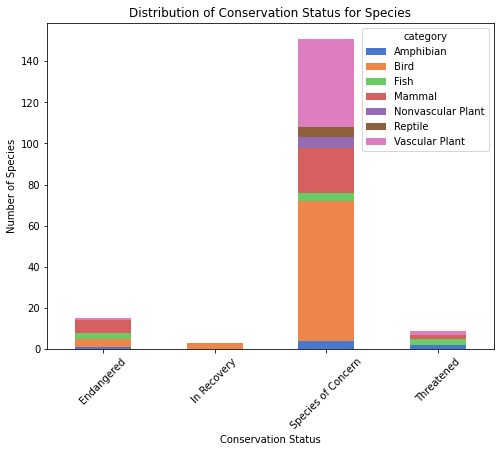

In [123]:
ax = conservation_group.plot(kind = "bar", figsize=(8,6), stacked=True)
ax.set_xlabel("Conservation Status")
plt.xticks(rotation = 45)
ax.set_ylabel("Number of Species")
plt.title("Distribution of Conservation Status for Species")
plt.show()

In [124]:
#Are certain types of species more likely to be endangered?
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [125]:
species_protected = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(index='category',
                               columns='is_protected', 
                               values ='scientific_name')\
                        .reset_index()
species_protected.columns = ['category', 'not_protected', 'protected']
species_protected.set_index(['category'], inplace = True)
species_protected

,not_protected,protected
category,,
Amphibian,72,7
Bird,413,75
Fish,115,10
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


In [126]:
species_protected['percent_protected'] = species_protected.protected / (species_protected.not_protected + species_protected.protected) * 100
species_protected

,not_protected,protected,percent_protected
category,,,
Amphibian,72,7,8.860759
Bird,413,75,15.368852
Fish,115,10,8.000000
Mammal,146,30,17.045455
Nonvascular Plant,328,5,1.501502
Reptile,73,5,6.410256
Vascular Plant,4216,46,1.079305


In [127]:
#Are the differences between species and their conservation status significant?
#Use Chi-square tests
#protected (first) vs not protected (second)
from scipy.stats import chi2_contingency

bird_reptile = [[75, 413],
            [5, 73]]
print(chi2_contingency(bird_reptile))
print("The p-value is 0.05, which is statistically significant.")

(3.7396547786854963, 0.05313542232154235, 1, array([[ 68.97526502, 419.02473498],
       [ 11.02473498,  66.97526502]]))
The p-value is 0.05, which is statistically significant.


In [128]:
fish_mammal = [[10, 115],
            [30, 146]]
print(chi2_contingency(fish_mammal))
print("The p-value is 0.04, which is statistically significant.")

(4.434482041318356, 0.03521990485242023, 1, array([[ 16.61129568, 108.38870432],
       [ 23.38870432, 152.61129568]]))
The p-value is 0.04, which is statistically significant.


In [129]:
bird_mammal = [[75, 413],
              [30, 146]]
print(chi2_contingency(bird_mammal))
print("The p-value is 0.68, which is not statistically significant.")

(0.16170148316545574, 0.6875948096661336, 1, array([[ 77.1686747, 410.8313253],
       [ 27.8313253, 148.1686747]]))
The p-value is 0.68, which is not statistically significant.


In [130]:
reptile_mammal = [[5, 73],
               [30, 146]]
print(chi2_contingency(reptile_mammal))
print("The p-value is 0.04, which is statistically significant.")

(4.289183096203645, 0.03835559022969898, 1, array([[ 10.7480315,  67.2519685],
       [ 24.2519685, 151.7480315]]))
The p-value is 0.04, which is statistically significant.


In [131]:
nonvas_vas = [[5, 328],
             [46, 4216]]
print(chi2_contingency(nonvas_vas))
print("The p-value is 0.18, which is not statistically significant.")

(0.19069121233812064, 0.6623419491381985, 1, array([[3.69597388e+00, 3.29304026e+02],
       [4.73040261e+01, 4.21469597e+03]]))
The p-value is 0.18, which is not statistically significant.


In [132]:
#Which animal is most prevalent and what is their distribution amongst parks?

merged = pd.merge(species, observations, on = "scientific_name", how = "inner")
merged.head()

,category,scientific_name,common_names,conservation_status,is_protected,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,Yosemite National Park,128


In [133]:
def observations_by_cat(n, df):
    sum_by_species = df.groupby(['scientific_name', 'category'])['observations']\
    .sum()\
    .reset_index()
    sorted_data = sum_by_species.sort_values(['observations'], ascending = False)
    return sorted_data.head(n)

print(observations_by_cat(10, merged))

            scientific_name        category  observations
4993  Streptopelia decaocto            Bird          1785
2452         Holcus lanatus  Vascular Plant          1780
1103      Castor canadensis          Mammal          1725
2555   Hypochaeris radicata  Vascular Plant          1720
4179          Puma concolor          Mammal          1711
4109          Procyon lotor          Mammal          1692
1359          Columba livia            Bird          1653
3322       Myotis lucifugus          Mammal          1547
583       Bidens tripartita  Vascular Plant          1296
3494        Oxalis dillenii  Vascular Plant          1276


In [134]:
by_park = merged\
    .groupby(["park_name", "category"])['observations']\
    .sum()\
    .unstack()
by_park

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7380,51647,12423,20550,32992,7950,443083
Great Smoky Mountains National Park,5707,37728,9206,15012,24857,5691,333619
Yellowstone National Park,19440,127251,30574,50795,83021,19554,1112927
Yosemite National Park,11444,76207,18615,30339,49783,11483,665461


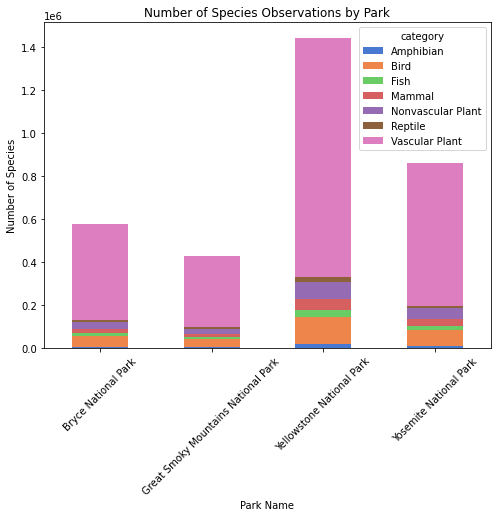

In [158]:
ax = by_park.plot(kind = "bar", figsize=(8,6), stacked=True)
ax.set_xlabel("Park Name")
plt.xticks(rotation = 45)
ax.set_ylabel("Number of Species")
plt.title("Number of Species Observations by Park")
plt.show()

In [159]:
by_cat = merged.groupby('category')['observations'].sum().reset_index()
by_cat_sorted = by_cat.sort_values(['observations'], ascending = False)
by_cat_sorted

,category,observations
6,Vascular Plant,2555090
1,Bird,292833
4,Nonvascular Plant,190653
3,Mammal,116696
2,Fish,70818
5,Reptile,44678
0,Amphibian,43971


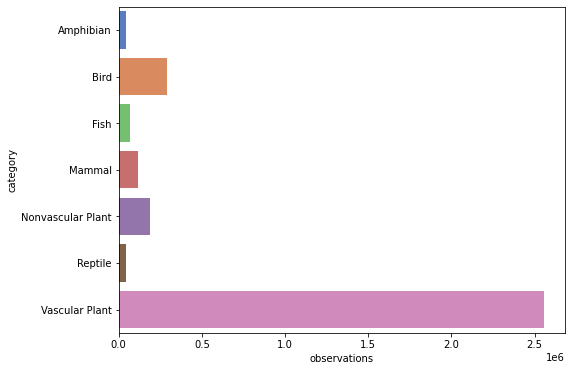

In [160]:
plt.figure(figsize=(8,6))
sns.barplot(data = by_cat, x = 'observations', y= 'category')
sns.set_palette("muted")
plt.show()

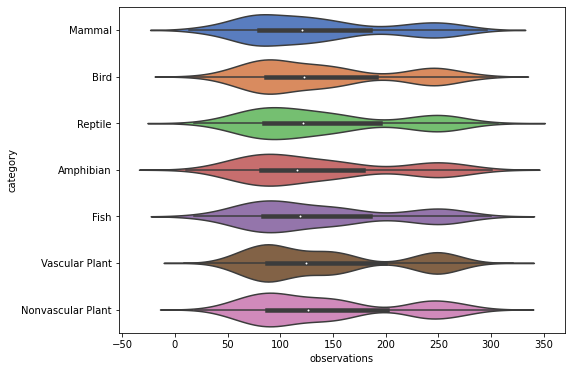

In [161]:
plt.figure(figsize=(8,6))
sns.violinplot(data = merged, x = 'observations', y= 'category')
sns.set_palette("muted")
plt.show()

In [162]:
no_plant_1 = by_cat_sorted[by_cat_sorted.category != 'Vascular Plant']
no_plant_2 = no_plant_1[no_plant_1.category != 'Nonvascular Plant']
no_plant_2

,category,observations
1,Bird,292833
3,Mammal,116696
2,Fish,70818
5,Reptile,44678
0,Amphibian,43971


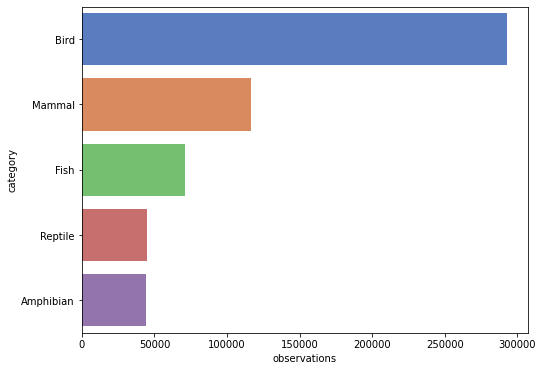

In [163]:
plt.figure(figsize=(8,6))
sns.barplot(data = no_plant_2, x = 'observations', y= 'category')
sns.set_palette("muted")
plt.show()

In [241]:
by_bird = merged[merged.category == "Bird"]\
    .groupby(["park_name", "category"])['observations']\
    .sum()\
    .reset_index()
by_bird_sort = by_bird.sort_values(['observations'], ascending = False)
by_bird_sort

,park_name,category,observations
2,Yellowstone National Park,Bird,127251
3,Yosemite National Park,Bird,76207
0,Bryce National Park,Bird,51647
1,Great Smoky Mountains National Park,Bird,37728


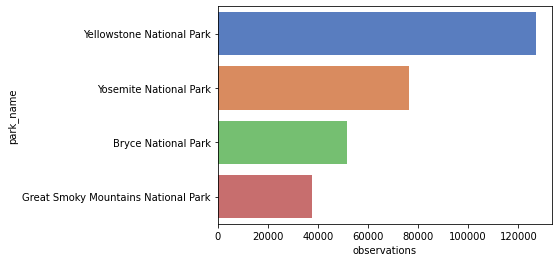

In [243]:
sns.barplot(data= by_bird_sort, y = "park_name", x = 'observations')
sns.set_palette("muted")

## Conclusion ##


+ What is the distribution of conservation status for species? 
    + The majority, 96.8%, of observed species need 'No Intervention'. 
    + Of those that need intervention:
        + 2.7% are 'Species of Concern' 
        + 0.3% are 'Engangered'
        + 0.2% are Threatened'
        + 0.1% are 'In Recovery'  
+ Are certain types of species more likely to be endangered?
    + Excluding the observed species that need 'No Intervention,' the remaining species were divded into 'protected' and 'not protected' categories to determine the percent endangered, i.e. requiring intervention. 
    + Mammals and birds are more likely to be endangered as approximately 17% and 15% of observed species are respectfully protected.
    + Amphibians, fish, and reptiles are within the 6-8% range of protection.
    + Nonvascular and vascular plants are the least likely to be protected at approximately 1-1.5% are protected. 
+ Are the differences between species and their conservation status significant?
    + I chose a small group of pairings to perform Chi-Square tests on to determine whether or not their conversation status was or was not significant. 
    + The results are as followed:
        + bird v. reptile had a p-value of 0.05, which **is** statistically significant."
        + fish v mammal had a p-value of 0.04, which **is** statistically significant."
        + bird v. mammal had a p-value of 0.68, which **is not** statistically significant."
        + reptile v. mammal had a p-value of 0.04, which **is** statistically significant."
        + nonvascular v vascular plant has of  p-value is 0.18, which **is not** statistically significant."
+ Which animal is most prevalent and what is their distribution amongst parks?
    + To determine which animal is most prevalent amongst parks, I merged both the species and observations dataframs together. I grouped by 'Park Name' and created a stacked bar graph. Unfortunately, the overwhelming majority of observations comprised of nonvascular and vascular plants. This was not only visiable in the stacked bar graph by park, but also when observations were broken down by species. As I was looking at which animal and not plant was most prevalent, I removed all plant observations from the dataframe and plotted observations by species. Birds were determined to have the highest observations amongst all parks. From there I made a new dataframe with only bird values and ploted the observation values for reach park. Yellowstone National Park had the most bird sightings amongst the four reporting parks. 